## Observations and Insights

1.There are total of 249 mice got tested with different drug regimens. Each mouse is tested at different time point after the drugs been used. The sizes of the tumor volumes are measured to keep track of the treatment result of each drug. Also the sample size is almost equally distributed between female and male mice.  Among all the drugs, Capomulin has the most data points. There 230 data points are collected to monitor Capomulin treatment results.

2.Among all the drug regimens, Capomulin and Ramicane has much better and reliable result comparing with all the other drugs. Both of Capomulin and Ramicane has smllar average tumor volume and lower standard variation value. That means the data set for Capomulin and Ramicane are clustered around the mean and more precise. 

3.Comparing the 4 most promising drugs, Capomulin and Ramicane has shorter box length, that means the data are more centralized that the other two. The average tumor volumes in Infubinol and Ceftamin are much higher than Capomulin and Ramicane. Between Capomulin and Ramicane, both drugs have very similar median Tumor Volumes, but Ramicane has a more evenly distributed tumor volume data. Similar result for comparing Infubinol and Ceftamin, the median value is similar. But Infubinol has a more centralized data set comparing with Ceftamin.

4.For Capomulin data set, there is a positive correlation between the weight of the mice and the tumor volume. The more the mouse weigh, the bigger the tumor volume is.  From the result of one random mouse, Capomulin shows a positive result in tumor volume reduction. At the end of 45 days treatment, the tumor volume showed a dramatically decrease. 


## Dependencies and starter code

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress


# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
combined_pymaceutical_data = pd.merge(mouse_metadata, study_results,how="outer", on="Mouse ID")
combined_pymaceutical_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


## Summary statistics

In [2]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using GroupBy in order to separate the data into fields according to "Drug Regimen" values
grouped_pymaceutical_df =combined_pymaceutical_data.groupby(['Drug Regimen'])
grouped_pymaceutical_df

In [3]:
tumor_volume=grouped_pymaceutical_df['Tumor Volume (mm3)'].agg(['mean','median','var','std','sem']).round(2)
tumor_volume

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.85,42.35,6.51,0.51
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


## Bar plots

In [4]:
#In original data, each row is the results of each mouse at different time point. 
#The number of the data point is the count of the total rows.
#Check and print the data point data first
data_points=grouped_pymaceutical_df['Drug Regimen'].count()
data_points

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     161
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Drug Regimen, dtype: int64

Text(0, 0.5, 'Numbers of Data point')

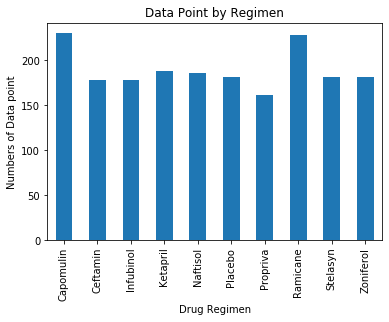

In [5]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
data_points.plot(kind="bar",y=data_points)
# Create the title and labels for the bar plot
plt.title("Data Point by Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Numbers of Data point")

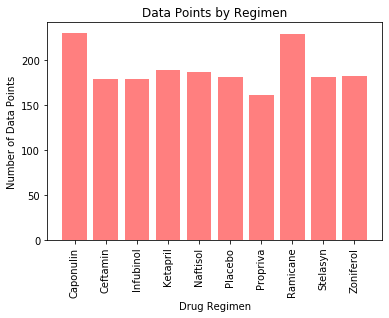

In [6]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
# Create value for x_axis and create the bar chart with 
x_axis= np.arange(len(data_points))
plt.bar(x_axis, data_points, color='r', alpha=0.5, align="center")
# replace each of the x_axis header and set the rotation for vertical
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["Caponulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol","Placebo",
                            "Propriva","Ramicane","Stelasyn","Zoniferol"],rotation='vertical')
# Create title and labels for the bar chart
plt.title("Data Points by Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")
plt.show()

## Pie plots

Text(0.5, 1.0, 'Sex Distribution')

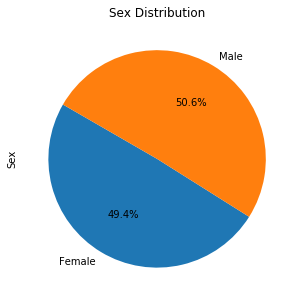

In [7]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
# Create new data frame grouped by sex
sex_df =combined_pymaceutical_data.groupby(['Sex'])
sex_count=sex_df['Sex'].count()
sex_count
# Create a pie plot wiht pandas
sex_count.plot(kind="pie",y=sex_count,figsize=(5, 5),autopct='%1.1f%%', startangle=150)
# Create the title and labels for the bar plot
plt.title("Sex Distribution")                                          

Text(0.5, 1.0, 'Sex Distribution')

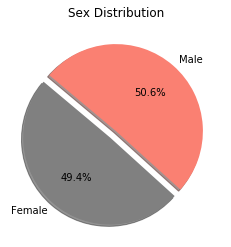

In [8]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# Create labels for the pie chart
labels=["Female","Male"]
colors=["Grey","Salmon"]
explode = (0.1,0)
plt.pie(sex_count,labels=labels, explode=explode,colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
# Add title for the pie chart
plt.title("Sex Distribution")

## Quartiles, outliers and boxplots

Calculate the final tumor volume of each mouse across four of the most promising treatment regimens:Capomulin, Ramicane,Infubinol and Ceftamin.
Generate a box plot of the final tumor volume of each mouse across four regimens of interest
1. Create a new combined tabel, pick the columns needed for the analysis. Group the data set by mouse ID and only pick the last result with .tail(1)
2. Create seperate groupby tables based on four different regimen.Calculate the final tumor volume for the four most promising treatment regimens seperately.

In [9]:
new_combine=pd.merge(mouse_metadata, study_results,how="inner", on="Mouse ID")
#new_combine
column_only=new_combine[["Mouse ID","Timepoint","Tumor Volume (mm3)","Drug Regimen"]]
#column_only
group_df=column_only.groupby(["Mouse ID"]).tail(1)
group_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Drug Regimen
9,k403,45,22.050126,Ramicane
19,s185,45,23.343598,Capomulin
29,x401,45,28.484033,Capomulin
39,m601,45,28.430964,Capomulin
49,g791,45,29.128472,Ramicane
...,...,...,...,...
1859,z314,5,45.934712,Stelasyn
1862,z435,10,48.710661,Propriva
1872,z581,45,62.754451,Infubinol
1882,z795,45,65.741070,Naftisol


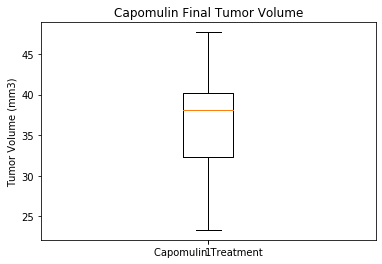

The lower quartile of Capomulin final volume is: 32.37735684
The upper quartile of Capomulin final volume is: 40.1592203
The interquartile range of Capomulin final volume is: 7.781863460000004
The the median of Capomulin final volume is: 38.125164399999996 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


In [22]:
# Create a new data frame for drug Capomulin
capomulin=group_df.loc[group_df['Drug Regimen']=='Capomulin']
volume_capomulin = capomulin['Tumor Volume (mm3)']

fig1, ax1 = plt.subplots()
ax1.set_title('Capomulin Final Tumor Volume')
ax1.set_ylabel('Tumor Volume (mm3)')
plt.xticks([1], ['Capomulin Treatment'])
ax1.boxplot(volume_capomulin)
plt.show()
# Calculate the IQR and quantitativily determine if there are any potential outliers. 
quartiles = capomulin['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Capomulin final volume is: {lowerq}")
print(f"The upper quartile of Capomulin final volume is: {upperq}")
print(f"The interquartile range of Capomulin final volume is: {iqr}")
print(f"The the median of Capomulin final volume is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

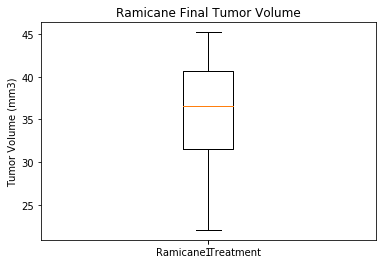

The lower quartile of Ramicane final volume is: 31.56046955
The upper quartile of Ramicane final volume is: 40.65900627
The interquartile range of Ramicane final volume is: 9.098536719999998
The the median of Ramicane final volume is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.


In [11]:
# Create a new data frame for drug Capomulin
ramicane=group_df.loc[group_df['Drug Regimen']=='Ramicane']
volume_ramicane = ramicane['Tumor Volume (mm3)']

fig1, ax1 = plt.subplots()
ax1.set_title('Ramicane Final Tumor Volume')
ax1.set_ylabel('Tumor Volume (mm3)')
plt.xticks([1], ['Ramicane Treatment'])
ax1.boxplot(volume_ramicane)
plt.show()
# Calculate the IQR and quantitativily determine if there are any potential outliers. 
quartiles = ramicane['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Ramicane final volume is: {lowerq}")
print(f"The upper quartile of Ramicane final volume is: {upperq}")
print(f"The interquartile range of Ramicane final volume is: {iqr}")
print(f"The the median of Ramicane final volume is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

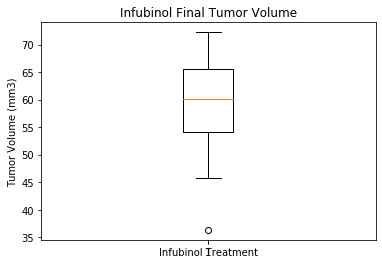

The lower quartile of Infubinol final volume is: 54.04860769
The upper quartile of Infubinol final volume is: 65.52574285
The interquartile range of Infubinol final volume is: 11.477135160000003
The the median of Infubinol final volume is: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.


In [12]:
# Create a new data frame for drug Capomulin
infubinol=group_df.loc[group_df['Drug Regimen']=='Infubinol']
volume_infubinol = infubinol['Tumor Volume (mm3)']

fig1, ax1 = plt.subplots()
ax1.set_title('Infubinol Final Tumor Volume')
ax1.set_ylabel('Tumor Volume (mm3)')
plt.xticks([1], ['Infubinol Treatment'])
ax1.boxplot(volume_infubinol)
plt.show()
# Calculate the IQR and quantitativily determine if there are any potential outliers. 
quartiles = infubinol['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Infubinol final volume is: {lowerq}")
print(f"The upper quartile of Infubinol final volume is: {upperq}")
print(f"The interquartile range of Infubinol final volume is: {iqr}")
print(f"The the median of Infubinol final volume is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

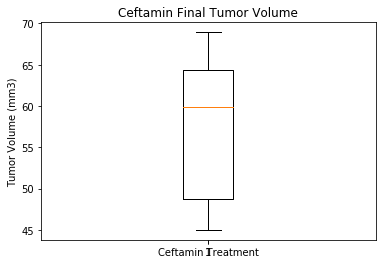

The lower quartile of Ceftamin final volume is: 48.72207785
The upper quartile of Ceftamin final volume is: 64.29983003
The interquartile range of Ceftamin final volume is: 15.577752179999997
The the median of Ceftamin final volume is: 59.85195552 
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.


In [33]:
# Create a new data frame for drug Capomulin
ceftamin=group_df.loc[group_df['Drug Regimen']=='Ceftamin']
volume_ceftamin = ceftamin['Tumor Volume (mm3)']


fig1, ax1 = plt.subplots()
ax1.set_title('Ceftamin Final Tumor Volume')
ax1.set_ylabel('Tumor Volume (mm3)')
plt.xticks([1], ['Ceftamin Treatment'])
ax1.boxplot(volume_ceftamin)
plt.show()
# Calculate the IQR and quantitativily determine if there areany potential outliers. 
quartiles = ceftamin['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Ceftamin final volume is: {lowerq}")
print(f"The upper quartile of Ceftamin final volume is: {upperq}")
print(f"The interquartile range of Ceftamin final volume is: {iqr}")
print(f"The the median of Ceftamin final volume is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

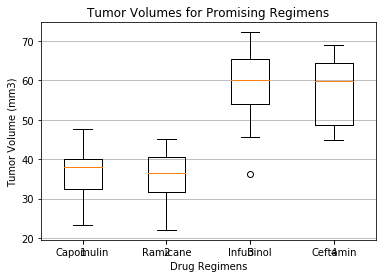

In [35]:
# Merge all the box plot to one
data = [volume_capomulin, volume_ramicane, volume_infubinol,volume_ceftamin]

fig, ax = plt.subplots()
ax.set_title('Tumor Volumes for Promising Regimens')
plt.xticks([1,2,3,4], ['Capomulin','Ramicane','Infubinol','Ceftamin'])
ax.boxplot(data)
ax.yaxis.grid(True)
ax.set_xlabel('Drug Regimens')
ax.set_ylabel('Tumor Volume (mm3)')
plt.show()

## Line and scatter plots

Text(0, 0.5, 'Tumor Volume(mm3)')

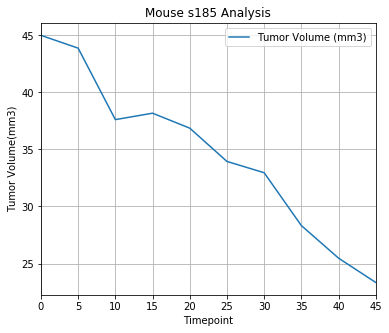

In [17]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
s185_df=combined_pymaceutical_data.loc[combined_pymaceutical_data['Mouse ID']=="s185",:]
s185_df.plot.line(x="Timepoint",y="Tumor Volume (mm3)",figsize=(6,5),grid=True)

plt.title("Mouse s185 Analysis")
plt.ylabel("Tumor Volume(mm3)")

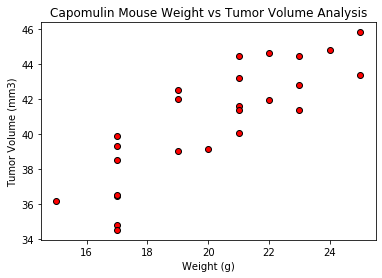

In [26]:
#Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin treatment regimen.
capomulin_new=combined_pymaceutical_data.loc[combined_pymaceutical_data['Drug Regimen']=='Capomulin']
x_axis=capomulin_new.groupby(['Mouse ID'])['Weight (g)'].mean()
y_axis=capomulin_new.groupby(['Mouse ID'])['Tumor Volume (mm3)'].mean()

plt.scatter(x_axis, y_axis, marker="o", facecolors="red", edgecolors="black",)
plt.title("Capomulin Mouse Weight vs Tumor Volume Analysis")
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()
plt.show()

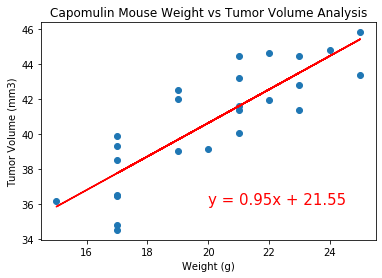

In [27]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(20,36),fontsize=15,color="red")
plt.title("Capomulin Mouse Weight vs Tumor Volume Analysis")
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()